In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image

import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir) 
from model.image_utils import *

In [2]:
bucket_id = 'inpainting-final-project'
path = 'images/Cars/cars_train/'

In [3]:
images = load_images_from_bucket(bucket_id, path)

In [4]:
#check the number of images 
len(images)

8126

In [5]:
#show an example image matrix 
images[0]

array([[[-0.34117647, -0.2       , -0.16862745],
        [-0.2627451 , -0.12156863, -0.09019608],
        [-0.45098039, -0.27843137, -0.23921569],
        ...,
        [ 0.9372549 ,  0.96862745,  0.97647059],
        [ 0.97647059,  1.        ,  1.        ],
        [ 0.9372549 ,  0.98431373,  0.98431373]],

       [[-0.34117647, -0.2       , -0.16862745],
        [-0.23137255, -0.09019608, -0.05882353],
        [-0.30196078, -0.15294118, -0.10588235],
        ...,
        [ 0.91372549,  0.98431373,  0.97647059],
        [ 0.90588235,  0.97647059,  0.96862745],
        [ 0.89803922,  0.94509804,  0.94509804]],

       [[-0.27843137, -0.1372549 , -0.11372549],
        [-0.35686275, -0.21568627, -0.18431373],
        [-0.31764706, -0.18431373, -0.1372549 ],
        ...,
        [ 0.89803922,  0.96862745,  0.96862745],
        [ 0.8745098 ,  0.95294118,  0.94509804],
        [ 0.90588235,  0.95294118,  0.95294118]],

       ...,

       [[ 0.35686275,  0.37254902,  0.28627451],
        [ 0

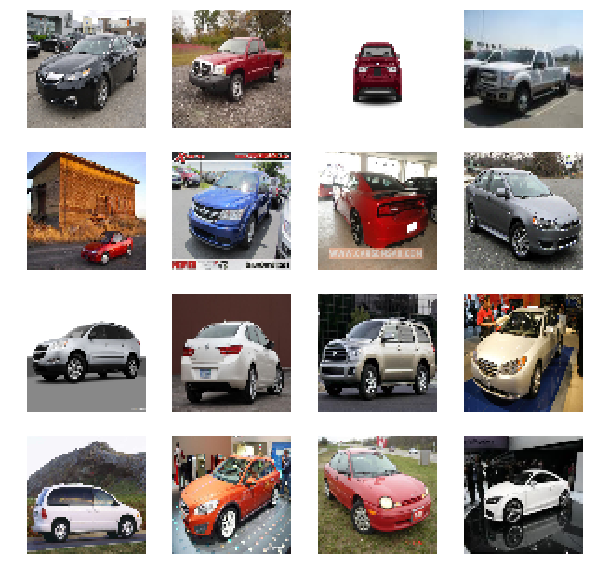

In [6]:
#visualize the preprocessed images

#convert the images back to 0-255 for visualization 

images2 = [cv2.normalize(i, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8) for i in images]
img_col = ImageCollector(np.asarray(images2))
img_col.show(np.asarray(images2))

In [7]:
images_with_noise = add_noise(images, 1, 5)

In [8]:
#train the model - generator and discriminator 

from model.dcgan import DCGAN

tf.reset_default_graph()
dcgan = DCGAN(batch_size=64,
              z_dim=100,
              model_name='DCGAN',
              data_source='Cars',
              z_dist='norm')
dcgan.train(images_with_noise, learning_rate=0.0001, iters=1500)

conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 8126
new size 8126
Step: 0, D_loss: 1.4900108575820923, G_loss: 0.4192015528678894
Step: 100, D_loss: 0.1391441375017166, G_loss: 5.675961494445801
Step: 200, D_loss: 1.1036996841430664, G_loss: 7.1565351486206055
Step: 300, D_loss: 0.3170166313648224, G_loss: 3.4886510372161865
Step: 400, D_loss: 0.3043823838233948, G_loss: 2.652005195617676
Step: 500, D_loss: 0.5153153538703918, G_loss: 2.66233491897583
Step: 600, D_loss: 0.22629526257514954, G_loss: 3.0899269580841064
Step: 700, D_loss: 0.47268441319465637, G_loss: 2.3413496017456055
Step: 800, D_loss: 0.43665051460266113, G_loss

In [9]:
# show the graph
from model.cnn_jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('../Cars/checkpoints/DCGAN.ckpt.meta')
    graph = tf.get_default_graph()
    show_graph(graph)
    

In [7]:
def my_pretty_viz(mypath,file_name,path_2_save):
    files = [f for f in listdir(mypath) if isfile(join(mypath, f))]    
    files.sort()
    files.sort(key = len)
    im = []
    
    
    for jpg in files:
        if jpg != '.keep':
            im.append(Image.open(mypath+'/'+jpg))

    x = []
    for i in im:
        x.append(np.asarray(i))

    for i in range(len(x)):
        image = x[i].squeeze()
        plt.subplot(3,5,i+1)
        plt.imshow(image, interpolation='nearest')
        plt.axis('off')
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    plt.savefig(mypath+'/'+ file_name, bbox_inches='tight')
    plt.show()
    
    return None

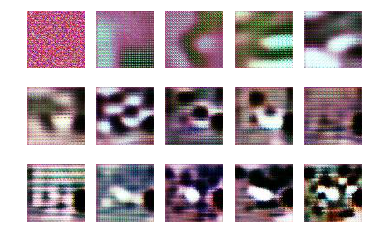

In [8]:
mypath = '../Cars/results'
my_pretty_viz(mypath, 'Cars_result', mypath)